<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as spam, or ham (not spam). </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile,  as you should be able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [35]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
#df = df.iloc[:, :2]
#df.columns = ['Catergory', 'Message']
#df.head(20)
# merging text from other columns, remove if accuracy affected
df["v2"] = df["v2"] + " " + df["Unnamed: 2"].fillna("") + " " + df["Unnamed: 3"].fillna("") + " " + df["Unnamed: 4"].fillna("")
df = df.iloc[:, :2]
df.columns = ['Catergory', 'Message']
df.head(20)  

,Catergory,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[1 Marks]

In [36]:
df["Message"]=df["Message"].str.replace("[^A-Za-z ]", " ", regex=True)
df["Message"]=df["Message"].str.replace(r"[^\x00-\x7f]_?", " ",regex=True)
df["Message"]=df["Message"].str.lower()


#df.head(20)
df

,Catergory,Message
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say...
4,ham,nah i don t think he goes to usf he lives aro...
...,...,...
5567,spam,this is the nd time we have tried contact u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that so any other s...
5570,ham,the guy did some bitching but i acted like i d...


<h3>3. Split the Data</h3>
<p>Split the data into three random samples, one for training the model, one for validation and the other for testing the model.  Create DataFrames named train_data, validation_data and test_data.  The train_data DataFrame should contain 60-70% of the data, validation_data 15-20% and the test_data DataFrame the remaining data.<p>  

<p>[1 Mark]</p>

In [37]:
from sklearn.model_selection import train_test_split

train_data, remaining = train_test_split(df, test_size=0.4, random_state=1)
validation_data , test_data = train_test_split(remaining, test_size=0.4, random_state=3)
train_data= train_data.reset_index(drop=True)
train_data # used to train model 
validation_data= validation_data.reset_index(drop=True)
validation_data # used to validate model
test_data= test_data.reset_index(drop=True)
train_data # used to test model

,Catergory,Message
0,ham,pa but not selected
1,ham,better than bb if he wont use it his wife wi...
2,ham,wen ur lovable bcums angry wid u dnt take it ...
3,ham,actually i decided i was too hungry so i haven...
4,spam,win urgent your mobile number has been awarde...
...,...,...
3338,ham,hey what s up charles sorry about the late rep...
3339,ham,oh oh den muz change plan liao go back h...
3340,ham,huh i cant thk of more oredi how many pages do...
3341,ham,i have printed it oh so lt gt come upst...


<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [38]:
#dfs = [train_data, validation_data, test_data]
df_word_freq = pd.DataFrame(columns = ["Word", "#Spam", "#Ham"])
words = []
spam = []
ham = []

for index, row in train_data.iterrows():

    r = row["Message"]
    cat = row["Catergory"]
    for w in r.strip().split():
        if w not in words:
            words.append(w)
            spam.append(0)
            ham.append(0)

        index = words.index(w)
        if cat == "spam":
            spam[index] = spam[index] + 1
        else:
            ham[index] = ham[index] + 1

df_word_freq["Word"] = words
df_word_freq["#Spam"] = spam
df_word_freq["#Ham"] = ham

df_word_freq


,Word,#Spam,#Ham
0,pa,0,16
1,but,5,264
2,not,12,229
3,selected,18,2
4,better,1,24
...,...,...,...
5949,cricket,0,1
5950,closeby,0,1
5951,pdate,1,0
5952,yhl,1,0


<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[1 Marks]</p>



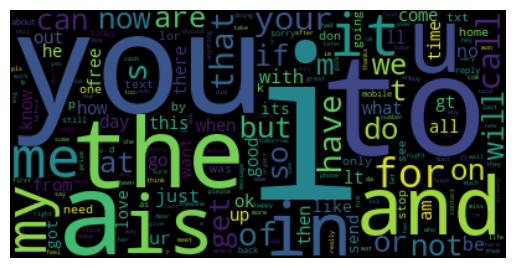

In [39]:
### this command required to install package for use by notebook on my laptop

# !pip install wordcloud

### ^^^^^ feel free to ignore this or use it to install your own wordcloud
from wordcloud import WordCloud

# Create a dictionary to store the frequency of each word
word_frequencies = {}

for i in range(len(words)):
    count = int(spam[i]) + int(ham[i])
    if words[i] not in word_frequencies:
        word_frequencies[words[i]] = count
    else:
        word_frequencies[words[i]] += count

# Generate a word cloud image
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [40]:
k = 1
word_prob = pd.DataFrame(columns = ["Word", "P(E|S)", "P(E|¬S)"])
#                      number of times word is seen in a spam message  
word_cal = pd.DataFrame(columns = ["Word", "present in spam"])
# total word count
count = 2*k # not 0 due to laPlace estimator


for index, row in df_word_freq.iterrows():
    count += int(row["#Spam"])

for index, row in df_word_freq.iterrows():
 
    word = row["Word"]
    # add 1 due to laPlace estimator
    spam = row["#Spam"] + k
    ham = row["#Ham"] + k
    x = round(spam/count,6)
    
    word_prob.loc[len(word_prob)] = {"Word": word, "P(E|S)": round(spam/count, 10), "P(E|¬S)": round(ham/count, 10)}

word_prob

,Word,P(E|S),P(E|¬S)
0,pa,0.000096,0.001639
1,but,0.000578,0.025545
2,not,0.001253,0.022171
3,selected,0.001832,0.000289
4,better,0.000193,0.002410
...,...,...,...
5949,cricket,0.000096,0.000193
5950,closeby,0.000096,0.000193
5951,pdate,0.000193,0.000096
5952,yhl,0.000193,0.000096


<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [41]:

spam = 1
ham = 1

#for ex11
'''
for index, row in validation_data.iterrows():

    r = row["Message"]
    cat = row["Catergory"]

    if cat == "spam":
        spam = spam + 1
    else:
        ham = ham + 1

prob_S = spam/(spam+ham)
prob_H = ham/(spam+ham)

word_prob["P(S)"] = prob_S
word_prob["P(¬S)"] = prob_H
'''

word_prob["P(S)"] = 0.5
word_prob["P(¬S)"] = 0.5
word_prob["P(S|E)"] = 0
word_prob["P(¬S|E)"] = 0
word_prob


for index, row in word_prob.iterrows():
    
    word_prob.loc[index,"P(S|E)"]=(
        (word_prob.loc[index,"P(E|S)"])*word_prob.loc[index,"P(S)"]
        )/(word_prob.loc[index,"P(E|S)"]*word_prob.loc[index,"P(S)"]
           +word_prob.loc[index,"P(E|¬S)"]*word_prob.loc[index,"P(¬S)"])
    
    word_prob.loc[index,"P(¬S|E)"] = ((word_prob.loc[index,"P(E|¬S)"])*word_prob.loc[index,"P(¬S)"]
                 )/(word_prob.loc[index,"P(E|¬S)"]*word_prob.loc[index,"P(¬S)"]
           +word_prob.loc[index,"P(E|S)"]*word_prob.loc[index,"P(S)"])

word_prob



,Word,P(E|S),P(E|¬S),P(S),P(¬S),P(S|E),P(¬S|E)
0,pa,0.000096,0.001639,0.5,0.5,0.055556,0.944444
1,but,0.000578,0.025545,0.5,0.5,0.022140,0.977860
2,not,0.001253,0.022171,0.5,0.5,0.053498,0.946502
3,selected,0.001832,0.000289,0.5,0.5,0.863636,0.136364
4,better,0.000193,0.002410,0.5,0.5,0.074074,0.925926
...,...,...,...,...,...,...,...
5949,cricket,0.000096,0.000193,0.5,0.5,0.333333,0.666667
5950,closeby,0.000096,0.000193,0.5,0.5,0.333333,0.666667
5951,pdate,0.000193,0.000096,0.5,0.5,0.666667,0.333333
5952,yhl,0.000193,0.000096,0.5,0.5,0.666667,0.333333


<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [42]:
from math import prod

def spamliness(words):# arr[str]
    arr = []  # Arr[Arr[word:Str, P(E|S):float, P(E|¬S):float]]
    for word in words :
        innerArr = [word]
        w = word_prob[word_prob["Word"] == word]
        if len(w) != 0:
            i = w.index.values[0]
            innerArr.append(w.loc[i,"P(E|S)"])
            innerArr.append(w.loc[i,"P(E|¬S)"])
            arr.append(innerArr)
        print(innerArr)
    print(arr)
    return arr
        

def spamliness_calc(words):
    return_val = spamliness(words)
    if return_val == []:
        return None
    pes = []
    pens = []
    s = word_prob.loc[0,"P(S)"]
    ns = word_prob.loc[0,"P(¬S)"]
    for w in return_val:
        pes.append(w[1])
        pens.append(w[2])
    spam_mess = s*prod(pes)/(s*prod(pes)+ns*prod(pens))
    not_spam = ns*prod(pens)/(ns*prod(pens)+s*prod(pes))

    return [spam_mess, not_spam]

print(spamliness_calc(["claim","free"]))
if spamliness_calc(["claim","free"])[0] <= spamliness_calc(["claim","free"])[1]:
    print("not spam")
else:
    print("spam")

['claim', 0.006940428, 9.63948e-05]
['free', 0.0125313283, 0.0030846347]
[['claim', 0.006940428, 9.63948e-05], ['free', 0.0125313283, 0.0030846347]]
[0.996592846102901, 0.0034071538970990045]
['claim', 0.006940428, 9.63948e-05]
['free', 0.0125313283, 0.0030846347]
[['claim', 0.006940428, 9.63948e-05], ['free', 0.0125313283, 0.0030846347]]
['claim', 0.006940428, 9.63948e-05]
['free', 0.0125313283, 0.0030846347]
[['claim', 0.006940428, 9.63948e-05], ['free', 0.0125313283, 0.0030846347]]
spam


<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[2 Mark]</p>

In [43]:
from math import log2

def spamliness_calc_log(words):
    return_val = spamliness(words)
    if return_val == []:
        return None
    pes = []
    pens = []
    s = word_prob.loc[0,"P(S)"]
    ns = word_prob.loc[0,"P(¬S)"]
    for w in return_val:
        pes.append(w[1])
        pens.append(w[2])
    spam_mess = sum(map(lambda x: log2(x), pes)) + log2(s) - (s*prod(pes)+ns*prod(pens))
    not_spam = sum(map(lambda x: log2(x), pens)) + log2(ns) - (log2(ns)*log2(prod(pens))+log2(s*prod(pes)))

    return spam_mess, not_spam

print(log2(spamliness_calc(["claim","free"])[0]), log2(spamliness_calc(["claim","free"])[1]))

print(spamliness_calc_log(["claim","free"]))

if spamliness_calc_log(["claim","free"])[0] <= spamliness_calc_log(["claim","free"])[1]:
    print("not spam")
else:
    print("spam")

['claim', 0.006940428, 9.63948e-05]
['free', 0.0125313283, 0.0030846347]
[['claim', 0.006940428, 9.63948e-05], ['free', 0.0125313283, 0.0030846347]]
['claim', 0.006940428, 9.63948e-05]
['free', 0.0125313283, 0.0030846347]
[['claim', 0.006940428, 9.63948e-05], ['free', 0.0125313283, 0.0030846347]]
-0.0049238770057035055 -8.19721717093281
['claim', 0.006940428, 9.63948e-05]
['free', 0.0125313283, 0.0030846347]
[['claim', 0.006940428, 9.63948e-05], ['free', 0.0125313283, 0.0030846347]]


TypeError: unsupported operand type(s) for *: 'float' and 'map'

In [ ]:
spamliness_calc("hi how are you see you tomorrow".split())

['hi', 0.0010603432, 0.0067476383]
['how', 0.000578369, 0.017929439]
['are', 0.0047233468, 0.0227491806]
['you', 0.0182186235, 0.1155774051]
['see', 0.0012531328, 0.0094466937]
['you', 0.0182186235, 0.1155774051]
['tomorrow', 0.0004819742, 0.0053981107]
[['hi', 0.0010603432, 0.0067476383], ['how', 0.000578369, 0.017929439], ['are', 0.0047233468, 0.0227491806], ['you', 0.0182186235, 0.1155774051], ['see', 0.0012531328, 0.0094466937], ['you', 0.0182186235, 0.1155774051], ['tomorrow', 0.0004819742, 0.0053981107]]


[3.0974294176287646e-07, 0.9999996902570581]

<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [ ]:

def model_performance(data):
    match_spam = 0
    match_ham = 0
    thought_spam_is_ham = 0
    thought_ham_is_spam = 0
    accuracy = 0


    for i in range(len(data)):
        cat = data.loc[i,"Catergory"]
        result = spamliness_calc_log(data.loc[i,"Message"].split())
        if result == None: result = [0.5,0.5]
        elif cat == "spam":
            if result[0] > result[1]: match_spam += 1
            else: thought_spam_is_ham += 1
        else:
            if result[1] > result[0]: match_ham += 1
            else: thought_ham_is_spam += 1
    accuracy = (match_spam+match_ham)/(match_spam+match_ham+thought_spam_is_ham+thought_ham_is_spam)
    print("match spam:", match_spam)
    print("match ham:", match_ham)
    print("thought spam is ham:", thought_spam_is_ham)
    print("thought ham is spam:", thought_ham_is_spam)
    print("accuracy:", accuracy)

model_performance(test_data)


['your', 0.0139772508, 0.0235203393]
['bill', 9.63948e-05, 0.0002891845]
['at', 0.0022170812, 0.0211104685]
['is', 0.0087719298, 0.0447272026]
['so', 0.0019278967, 0.0249662618]
['thats', 9.63948e-05, 0.002313476]
['not', 0.0012531328, 0.0221708116]
['bad', 9.63948e-05, 0.0022170812]
[['your', 0.0139772508, 0.0235203393], ['bill', 9.63948e-05, 0.0002891845], ['at', 0.0022170812, 0.0211104685], ['is', 0.0087719298, 0.0447272026], ['so', 0.0019278967, 0.0249662618], ['thats', 9.63948e-05, 0.002313476], ['not', 0.0012531328, 0.0221708116], ['bad', 9.63948e-05, 0.0022170812]]
['uncle', 9.63948e-05, 0.0006747638]
['boye', 9.63948e-05, 0.0001927897]
['i', 0.0035666088, 0.1755349913]
['need', 0.0008675535, 0.0096394833]
['movies', 9.63948e-05, 0.0002891845]
['oh', 0.0001927897, 0.0065548487]
['guide', 9.63948e-05, 0.0002891845]
['me', 0.0018315018, 0.0418353576]
['plus', 0.000578369, 0.0009639483]
['you', 0.0182186235, 0.1155774051]
['know', 0.0016387122, 0.013880856]
['torrents']
['are', 0.0

<h3>11. Improvements</h3>
<p>Utilise the validation set to assess the performance of various word sets in classifying spam and non-spam (ham) emails. Compare the effectiveness of different sets of words to determine their impact on classification accuracy.</p>
<p>[3 Mark]</p>

In [ ]:
# re-initialize variables

train_data, remaining = train_test_split(df, test_size=0.4, random_state=1)
validation_data , test_data = train_test_split(remaining, test_size=0.4, random_state=3)
train_data= train_data.reset_index(drop=True) # used to train model 
validation_data= validation_data.reset_index(drop=True) # used to validate model
test_data= test_data.reset_index(drop=True) # used to test model

df_word_freq = pd.DataFrame(columns = ["Word", "#Spam", "#Ham"])
words = []
spam = []
ham = []

for index, row in train_data.iterrows():
    r = row["Message"]
    cat = row["Catergory"]
    for w in r.strip().split():
        if w not in words:
            words.append(w)
            spam.append(0)
            ham.append(0)
        index = words.index(w)
        if cat == "spam": spam[index] = spam[index] + 1
        else: ham[index] = ham[index] + 1

df_word_freq["Word"] = words
df_word_freq["#Spam"] = spam
df_word_freq["#Ham"] = ham


k = 1
word_prob = pd.DataFrame(columns = ["Word", "P(E|S)", "P(E|¬S)"])

word_cal = pd.DataFrame(columns = ["Word", "present in spam"])

count = 2*k

for index, row in df_word_freq.iterrows():
    count += int(row["#Spam"])

for index, row in df_word_freq.iterrows():

    word = row["Word"]
    spam = row["#Spam"] + k
    ham = row["#Ham"] + k
    x = round(spam/count,6)
    word_prob.loc[len(word_prob)] = {"Word": word, "P(E|S)": round(spam/count, 10), "P(E|¬S)": round(ham/count, 10)}

spam = 1
ham = 1




# for ex11, using validation data for priors

In [ ]:
############## for ex11, using validation data for priors

for index, row in validation_data.iterrows():
    r = row["Message"]
    cat = row["Catergory"]
    if cat == "spam": spam = spam + 1
    else: ham = ham + 1

prob_S = spam/(spam+ham)
prob_H = ham/(spam+ham)

word_prob["P(S)"] = prob_S
word_prob["P(¬S)"] = prob_H
##############

In [ ]:
word_prob["P(S|E)"] = 0
word_prob["P(¬S|E)"] = 0
word_prob


for index, row in word_prob.iterrows():
    
    word_prob.loc[index,"P(S|E)"]=(
        (word_prob.loc[index,"P(E|S)"])*word_prob.loc[index,"P(S)"]
        )/(word_prob.loc[index,"P(E|S)"]*word_prob.loc[index,"P(S)"]
           +word_prob.loc[index,"P(E|¬S)"]*word_prob.loc[index,"P(¬S)"])
    
    word_prob.loc[index,"P(¬S|E)"] = ((word_prob.loc[index,"P(E|¬S)"])*word_prob.loc[index,"P(¬S)"]
                 )/(word_prob.loc[index,"P(E|¬S)"]*word_prob.loc[index,"P(¬S)"]
           +word_prob.loc[index,"P(E|S)"]*word_prob.loc[index,"P(S)"])



In [ ]:
model_performance(test_data)

['your', 0.0139772508, 0.0235203393]
['bill', 9.63948e-05, 0.0002891845]
['at', 0.0022170812, 0.0211104685]
['is', 0.0087719298, 0.0447272026]
['so', 0.0019278967, 0.0249662618]
['thats', 9.63948e-05, 0.002313476]
['not', 0.0012531328, 0.0221708116]
['bad', 9.63948e-05, 0.0022170812]
[['your', 0.0139772508, 0.0235203393], ['bill', 9.63948e-05, 0.0002891845], ['at', 0.0022170812, 0.0211104685], ['is', 0.0087719298, 0.0447272026], ['so', 0.0019278967, 0.0249662618], ['thats', 9.63948e-05, 0.002313476], ['not', 0.0012531328, 0.0221708116], ['bad', 9.63948e-05, 0.0022170812]]
['uncle', 9.63948e-05, 0.0006747638]
['boye', 9.63948e-05, 0.0001927897]
['i', 0.0035666088, 0.1755349913]
['need', 0.0008675535, 0.0096394833]
['movies', 9.63948e-05, 0.0002891845]
['oh', 0.0001927897, 0.0065548487]
['guide', 9.63948e-05, 0.0002891845]
['me', 0.0018315018, 0.0418353576]
['plus', 0.000578369, 0.0009639483]
['you', 0.0182186235, 0.1155774051]
['know', 0.0016387122, 0.013880856]
['torrents']
['are', 0.0

there is a slight decrease when using priors from our validation data probably due to a a low sample size of messages leading to unfavorable priors

original:
match spam: 73, 
match ham: 765, 
thought spam is ham: 52, 
thought ham is spam: 1, 
accuracy: 0.9405162738496072

<h3></h3>

In [ ]:
# altering function
# P (C = cα|wi) ≈ 1 or 0   is good word!!!!
# P (C = cα|wi) ≈ 1/numberOfWords    is bad word!!!! so we ignore
def spamliness(words):# arr[str]
    arr = []  # Arr[Arr[word:Str, P(E|S):float, P(E|¬S):float]]
    nc_inv = 1/len(word_prob)
    for word in words :
        innerArr = [word]
        w = word_prob[word_prob["Word"] == word]
        
        if len(w) != 0:
            p = word_prob.loc[word_prob["Word"] == word, ["P(S|E)"]].values[0][0]
            # ignore word if P (C = cα|wi) ≈ 1/numberOfWords
            if (p+p>nc_inv and p-0.9*p<nc_inv ):
                continue
            i = w.index.values[0]
            innerArr.append(w.loc[i,"P(E|S)"])
            innerArr.append(w.loc[i,"P(E|¬S)"])
            arr.append(innerArr)
    return arr

model_performance(test_data)

match spam: 70
match ham: 764
thought spam is ham: 55
thought ham is spam: 0
accuracy: 0.9381327334083239


the goodword and badword classification is not particularly that impactful overall, most likely due to my already high accuracy

original:
match spam: 73, 
match ham: 765, 
thought spam is ham: 52, 
thought ham is spam: 1, 
accuracy: 0.9405162738496072